In [61]:
!apt-get -y install openjdk-8-jre-headless
!pip install statsmodels
!pip install pmdarima
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive') 

In [ ]:
%matplotlib inline
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import data 
df = pd.read_csv('/content/gdrive/My Drive/碩一/Big data/final/all_info_utf8.csv', header=0)
taipei1 = df[df['市場名稱']=='台北一'] #市場

crops = ['香蕉', '鳳梨-金鑽鳳梨', '青蔥-日蔥', '蓮霧-紅蓮霧', '芽菜類-黃豆芽','南瓜-木瓜形', '大蒜-蒜仁','小白菜-土白菜','木瓜-網室紅肉','洋香瓜-網狀紅肉']
df_crop = taipei1[taipei1['作物名稱']==crops[9]] #change crop
df_crop1 = df_crop[['DateTime', '平均價', '3_day_return']].reset_index(drop=True)
firstDay = df_crop1[df_crop1.DateTime == '2019-01-01'].index[0] #index the of first day to predict

'''
plt.rcParams.update({'figure.figsize':(15,7)})

# Original Series
fig, axes = plt.subplots(3, 3)
#axes[0, 0].plot(banana_taipei1.平均價) 
axes[0, 0].plot(banana_taipei1['5_day_return']) 
axes[0, 0].set_title('Original Series')
plot_acf(banana_taipei1.平均價, ax=axes[0, 1])
plot_pacf(banana_taipei1.平均價, ax=axes[0, 2])

# 1st Differencing
#diff1 = banana_taipei1.平均價.diff()
diff1 = banana_taipei1['5_day_return'].diff()
axes[1, 0].plot(diff1)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff1.dropna(), ax=axes[1, 1])
plot_pacf(diff1.dropna(), ax=axes[1, 2])


# 2nd Differencing
#diff2 = banana_taipei1.平均價.diff().diff()
diff2 = banana_taipei1['5_day_return'].diff().diff()
axes[2, 0].plot(diff2)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff2.dropna(), ax=axes[2, 1])
plot_pacf(diff2.dropna(), ax=axes[2, 2])


plt.show()
'''

"\nplt.rcParams.update({'figure.figsize':(15,7)})\n\n# Original Series\nfig, axes = plt.subplots(3, 3)\n#axes[0, 0].plot(banana_taipei1.平均價) \naxes[0, 0].plot(banana_taipei1['5_day_return']) \naxes[0, 0].set_title('Original Series')\nplot_acf(banana_taipei1.平均價, ax=axes[0, 1])\nplot_pacf(banana_taipei1.平均價, ax=axes[0, 2])\n\n# 1st Differencing\n#diff1 = banana_taipei1.平均價.diff()\ndiff1 = banana_taipei1['5_day_return'].diff()\naxes[1, 0].plot(diff1)\naxes[1, 0].set_title('1st Order Differencing')\nplot_acf(diff1.dropna(), ax=axes[1, 1])\nplot_pacf(diff1.dropna(), ax=axes[1, 2])\n\n\n# 2nd Differencing\n#diff2 = banana_taipei1.平均價.diff().diff()\ndiff2 = banana_taipei1['5_day_return'].diff().diff()\naxes[2, 0].plot(diff2)\naxes[2, 0].set_title('2nd Order Differencing')\nplot_acf(diff2.dropna(), ax=axes[2, 1])\nplot_pacf(diff2.dropna(), ax=axes[2, 2])\n\n\nplt.show()\n"

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# get the best parameters with training data from 2012~2018
f_all = ['平均價', '3_day_return']
f = f_all[1]
train = df_crop1[f][0:firstDay]
model = pm.auto_arima(train, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd' none
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19948.605, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20270.192, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19947.681, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=20012.431, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=19946.897, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=19758.447, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=19716.598, Time=0.22 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=19718.448, Time=0.28 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=19718.530, Time=0.57 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=19725.858, Time=0.63 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=19719.597, Time=1.53 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=19700.270, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=19736.228, Time=0.36 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=19701.646, Time=0.54 sec
 ARIMA(4,0,1)(0,0,0

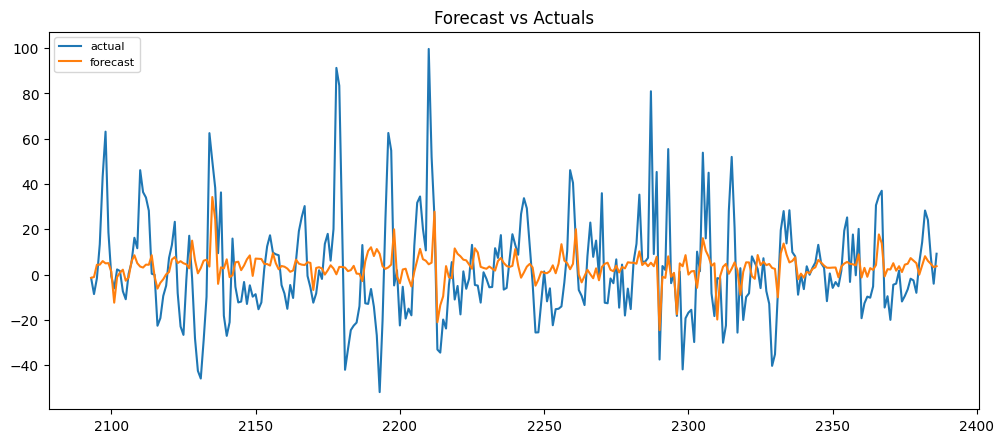

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#predict first week 2019-01-01~2019-01-07 with training data from 2012~2018-12-31
# Actual vs Fitted
train = df_crop1[f][0:firstDay]
test = df_crop1[f][firstDay:firstDay+7]
test_num = len(test)
best_order = (5,0,2)
# Build Model
model = ARIMA(train, order = best_order)  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(test_num, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

#for predicting later weeks, train with 2012~2018-12-31+the week before prediction week
#########################
total = len(df_crop1[f])
total_pred = len(df_crop1[f][firstDay:])
i = firstDay
#print(total)

while (i+7)<total:
  #print(i)
  train_seq = train.append(df_crop1[f][i:i+7])
  i=i+7
  
  if (i+7)>total:
    test_num = total-i
  else:
    test_num = 7
  
  test = df_crop1[f][i:i+test_num]
  #test_num = len(test)
  model_seq = ARIMA(train_seq, order = best_order)  
  fitted_seq = model_seq.fit(disp=-1)  
  fc_seq, se, conf = fitted_seq.forecast(test_num, alpha=0.05)
  fc_seq = pd.Series(fc_seq, index=test.index)
  fc_series = fc_series.append(fc_seq)

##################
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_crop1[f][firstDay:], label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
#save file
df_ = pd.DataFrame(df_crop1.DateTime[firstDay:],columns=['DateTime'])
df_ = df_.assign(original = df_crop1[f][firstDay:])
df_ = df_.assign(predict = fc_series)
df_.to_csv(r'/content/gdrive/My Drive/碩一/Big data/final/洋香瓜_3DayReturn.csv', sep=',', mode='a')
#df_.to_csv(r'/content/gdrive/My Drive/碩一/Big data/final/洋香瓜_price.csv', sep=',', mode='a')

In [ ]:
#calculate MSE
from sklearn.metrics import mean_squared_error
m = df_crop1[f][firstDay:].sum()/total_pred
max = df_crop1[f][firstDay:].max()
min = df_crop1[f][firstDay:].min()
normalize_original =  (df_crop1[f][firstDay:]-m)/(max-min)
m = fc_series.sum()/total_pred
max = fc_series.max()
min = fc_series.min()
normalize_pred = (fc_series-m)/(max-min)
MSE = mean_squared_error(normalize_original, normalize_pred)
print(MSE)


0.023422581765385423


In [ ]:
##################model parameters and MSE####################
#banana 平均價 ARIMA(5,1,4) MSE = 0.022870311364136264
#banana 3 day return ARIMA(8,0,5) MSE = 0.030847703767234284
#pineapple 平均價 ARIMA(1,0,0) MSE = 0.015848874573361756
#pineapple 3 day return ARIMA(6,0,3) MSE = 0.0279238705555505
#蔥 平均價 ARIMA(1,0,6) MSE = 0.009116261637411176
#蔥 3 day return ARIMA(6,0,3) MSE = 0.016461307137880615
#蓮霧 平均價 ARIMA(1,0,2) MSE = 0.014541966352394723
#蓮霧 3 day return ARIMA(7,0,7) MSE = 0.023426141972368884
#黃豆牙 平均價 ARIMA(1,0,1) MSE = 0.029068830149352028
#黃豆牙 3 day return ARIMA(1,0,1) MSE = 0.02270993237992869
#南瓜 平均價 ARIMA(4,0,2) MSE = 0.00920049872493712
#南瓜 3 day return ARIMA(10,0,0) MSE = 0.015404879021708232
#大蒜 平均價 ARIMA(3,1,0) MSE = 0.003066085068849201
#大蒜 3 day return ARIMA(10,0,0) MSE = 0.0064104575241076605
#小白菜 平均價 ARIMA(5,0,2) MSE = 0.02432733624456985
#小白菜 3 day return ARIMA(4,0,2) MSE = 0.023478751038083025
#木瓜 平均價 ARIMA(4,0,2) MSE = 0.03323794347096069
#木瓜 3 day return ARIMA(10,0,1) MSE = 0.01990129382698422
#洋香瓜 平均價 ARIMA(5,0,2) MSE = 0.02310215752943491
#洋香瓜 3 day return ARIMA(5,0,2) MSE = 0.023422581765385423

In [60]:
#for VIS
#pcp_csv = banana_taipei.drop(['Year','Month', 'Day', '作物代號', '作物名稱', '市場代號', '市場名稱', '1_day_return', '3_day_return', '5_day_return', 'DateTime','強度','警報發布報數'], axis = 1)
#pcp_csv.to_csv(r'/content/gdrive/My Drive/碩一/Big data/final/pcp_csv.txt', index=None, sep=',', mode='a')